First let us import the necessary libraries and the pre trained VGG16 class

In [2]:
import tensorflow
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16


In [3]:
from keras.preprocessing.image import ImageDataGenerator

Since i am using google colab let us first mount the drive 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check and set the working directory location

In [5]:
os.chdir("/content/drive/MyDrive/data")

In [6]:
os.getcwd()

'/content/drive/MyDrive/data'

Preprocessing

In [7]:
train_image = ImageDataGenerator(rescale = 1./255,
                                       rotation_range=40,
                                       horizontal_flip = True)

creating a batch of size 128 which has a target size of 128x128 from training

In [8]:
train_gen = train_image.flow_from_directory("/content/drive/MyDrive/data/train",
                                                        target_size = (128,128), batch_size=128, class_mode = 'binary')

Found 20001 images belonging to 2 classes.


Rescaling of the test images

In [9]:
valid_image = ImageDataGenerator(rescale = 1./255)

creating a batch of size 128 which has a target size of 128x128 from test

In [10]:
valid_gen = valid_image.flow_from_directory(directory="/content/drive/MyDrive/data/test", 
                                                                   target_size = (128,128), batch_size=128, class_mode = 'binary')

Found 5000 images belonging to 2 classes.


importing the pretrained model VGG16 using the weights from imagenet by not including the top layer


In [11]:
conv_model = VGG16(input_shape=(128,128,3), include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [12]:
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [13]:
for layer in conv_model.layers:
    layer.trainable = False

let us now create the model with conv model

In [14]:
model = Sequential()
model.add(conv_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 16,853,313
Trainable params: 2,138,625
Non-trainable params: 14,714,688
____________________________________

let us now compile the model

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history =model.fit(train_gen, batch_size = 16, steps_per_epoch = 16, epochs = 10, verbose = 1, validation_data = valid_gen)

Epoch 1/10
16/16 [==============================] - 1463s 93s/step - loss: 1.3864 - accuracy: 0.5185 - val_loss: 0.6464 - val_accuracy: 0.5700
Epoch 2/10
16/16 [==============================] - 401s 25s/step - loss: 0.6391 - accuracy: 0.5784 - val_loss: 1.1090 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 362s 23s/step - loss: 0.6966 - accuracy: 0.6232 - val_loss: 0.4207 - val_accuracy: 0.8250
Epoch 4/10
16/16 [==============================] - 325s 20s/step - loss: 0.4998 - accuracy: 0.7652 - val_loss: 0.3529 - val_accuracy: 0.8454
Epoch 5/10
16/16 [==============================] - 291s 18s/step - loss: 0.5326 - accuracy: 0.7337 - val_loss: 0.3437 - val_accuracy: 0.8414
Epoch 6/10
16/16 [==============================] - 262s 16s/step - loss: 0.4465 - accuracy: 0.7927 - val_loss: 0.3101 - val_accuracy: 0.8692
Epoch 7/10
16/16 [==============================] - 243s 15s/step - loss: 0.4655 - accuracy: 0.7910 - val_loss: 0.3106 - val_accuracy: 0.8706
Epoch

In [18]:
#visualization
import matplotlib.pyplot as plt

let us plot the accuracy and compare it with epoch

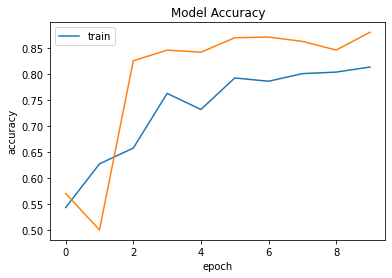

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

let us now plot the loss and compare it with epoch

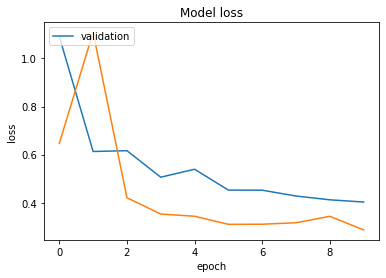

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.show()

in terms of accuracy pre trained models ar better
than models created from scratch